In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cdist
!pip install joblib
import joblib

In [1]:
!pip install joblib
import joblib

### Load PCA-transformed data

In [3]:
file_path = Path(r"C:\Programowanie\.vscode\projekt_people_analytics\filename.csv")
data_pca = pd.read_csv(file_path)

### We implement K-Means clustering with silhouette analysis to determine the optimal number of clusters.

In [4]:
# K means
def kmeans_clustering(data, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), silhouette_scores)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('K-Means: Silhouette Analysis')
    
    plt.subplot(1, 2, 2)
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title(f'K-Means Clustering (k={optimal_clusters})')
    plt.tight_layout()
    plt.show()
    
    return kmeans_labels

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is implemented as an alternative clustering method.

In [5]:
def dbscan_clustering(data, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=dbscan_labels, cmap='viridis')
    plt.title('DBSCAN Clustering')
    plt.show()
    
    return dbscan_labels

In [6]:
def dunn_index(X, labels):
    distances = pdist(X)
    dist_matrix = squareform(distances)
    
    unique_labels = np.unique(labels)
    
    min_inter_cluster_distance = np.inf
    max_intra_cluster_distance = 0
    
    for label in unique_labels:
        cluster_points = X[labels == label]
        #Calculating intra cluster distances
        #If the cluster has more than one point, it calculates the maximum distance within the cluster
        if len(cluster_points) > 1:
            intra_cluster_distances = pdist(cluster_points)
            max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_cluster_distances))
        #This calculates the minimum distance between the current cluster and all other clusters.
        for other_label in unique_labels:
            if label != other_label:
                other_cluster_points = X[labels == other_label]
                inter_cluster_distances = cdist(cluster_points, other_cluster_points).flatten()
                min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_cluster_distances))
    
    return min_inter_cluster_distance / max_intra_cluster_distance if max_intra_cluster_distance > 0 else 0

In [7]:
def evaluate_clustering(X, labels):
    sil_score = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    dunn_score = dunn_index(X, labels)
    
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Calinski-Harabasz Index: {ch_score:.4f}")
    print(f"Davies-Bouldin Index: {db_score:.4f}")
    print(f"Dunn Index: {dunn_score:.4f}")

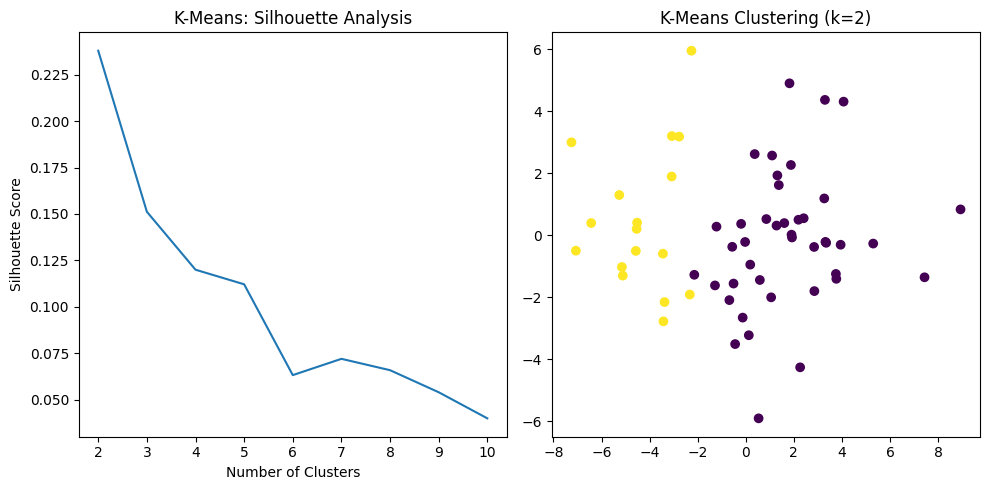

In [8]:
kmeans_labels = kmeans_clustering(data_pca)

In [9]:
evaluate_clustering(data_pca, kmeans_labels)

Silhouette Score: 0.2379
Calinski-Harabasz Index: 18.4327
Davies-Bouldin Index: 1.5564
Dunn Index: 0.2856


In [10]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    print(f"\nEvaluation for {n_clusters} clusters:")
    evaluate_clustering(data_pca, labels)


Evaluation for 2 clusters:
Silhouette Score: 0.2379
Calinski-Harabasz Index: 18.4327
Davies-Bouldin Index: 1.5564
Dunn Index: 0.2856

Evaluation for 3 clusters:
Silhouette Score: 0.1512
Calinski-Harabasz Index: 14.0789
Davies-Bouldin Index: 1.8110
Dunn Index: 0.3295

Evaluation for 4 clusters:
Silhouette Score: 0.1200
Calinski-Harabasz Index: 11.5467
Davies-Bouldin Index: 1.9056
Dunn Index: 0.2711

Evaluation for 5 clusters:
Silhouette Score: 0.1121
Calinski-Harabasz Index: 9.7615
Davies-Bouldin Index: 1.7537
Dunn Index: 0.3093

Evaluation for 6 clusters:
Silhouette Score: 0.0632
Calinski-Harabasz Index: 8.2587
Davies-Bouldin Index: 1.8373
Dunn Index: 0.2916

Evaluation for 7 clusters:
Silhouette Score: 0.0720
Calinski-Harabasz Index: 7.9671
Davies-Bouldin Index: 1.8665
Dunn Index: 0.3093

Evaluation for 8 clusters:
Silhouette Score: 0.0659
Calinski-Harabasz Index: 7.1335
Davies-Bouldin Index: 1.9446
Dunn Index: 0.2916

Evaluation for 9 clusters:
Silhouette Score: 0.0540
Calinski-Hara

In [23]:
best_silhouette = -1
best_n_clusters = 0

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    sil_score = silhouette_score(data_pca, labels)
    
    if sil_score > best_silhouette:
        best_silhouette = sil_score
        best_n_clusters = n_clusters

print(f"Best Silhouette Score: {best_silhouette:.4f} (with {best_n_clusters} clusters)")

Best Silhouette Score: 0.2379 (with 2 clusters)


In [11]:
# Dendogram - Hierarchical Clustering
def hierarchical_clustering(data, method='ward'):
    linkage_matrix = linkage(data, method)
    
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.show()

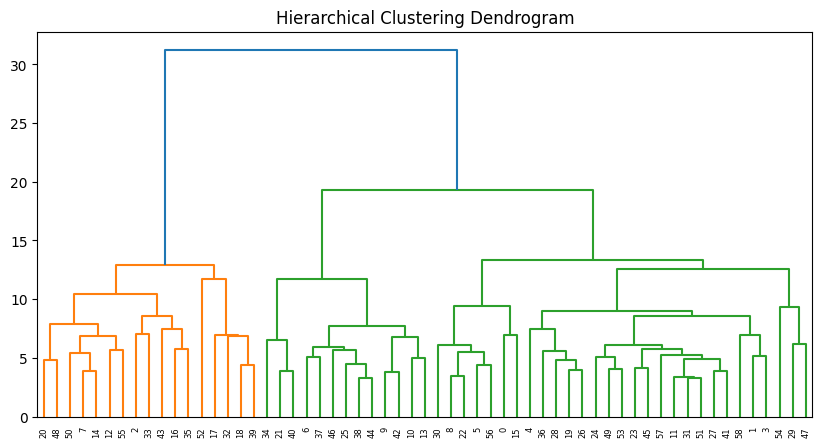

In [12]:
# Hierarchical Clustering dendogram
hierarchical_clustering(data_pca)

In [13]:
# K means for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)


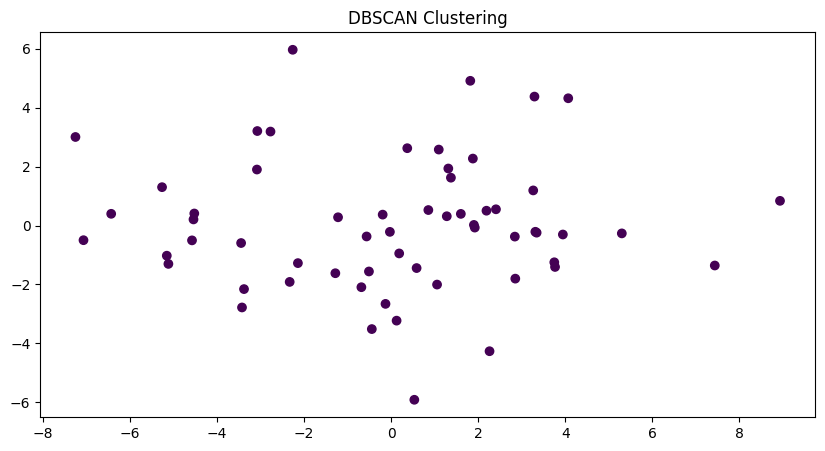

In [14]:
dbscan_labels = dbscan_clustering(data_pca)

In [18]:
# BEST MODEL
# K means for 3 clusters
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_model.fit_predict(data_pca)
kmeans_model.cluster_centers_


array([[ 1.75422750e+00, -2.09288355e-01,  2.16784605e-01,
        -5.20690022e-02, -6.02049254e-02, -3.80138441e-02,
        -5.38254722e-02,  4.11346840e-02, -5.06240244e-02,
         1.79249012e-02, -1.01328005e-02, -1.92587933e-02,
         2.97538743e-02,  1.85224723e-02,  4.03768898e-02,
        -1.58605023e-03, -1.43254823e-02,  1.49417211e-02,
        -3.16185577e-03, -2.71676677e-02,  1.67872782e-02,
         1.61904762e+00],
       [-4.33397381e+00,  5.17065347e-01, -5.35585495e-01,
         1.28641064e-01,  1.48741580e-01,  9.39165560e-02,
         1.32980578e-01, -1.01626866e-01,  1.25071119e-01,
        -4.42850500e-02,  2.50339777e-02,  4.75805482e-02,
        -7.35095718e-02, -4.57614021e-02, -9.97546688e-02,
         3.91847703e-03,  3.53923679e-02, -3.69148404e-02,
         7.81164366e-03,  6.71201203e-02, -4.14744520e-02,
         1.17647059e-01]])

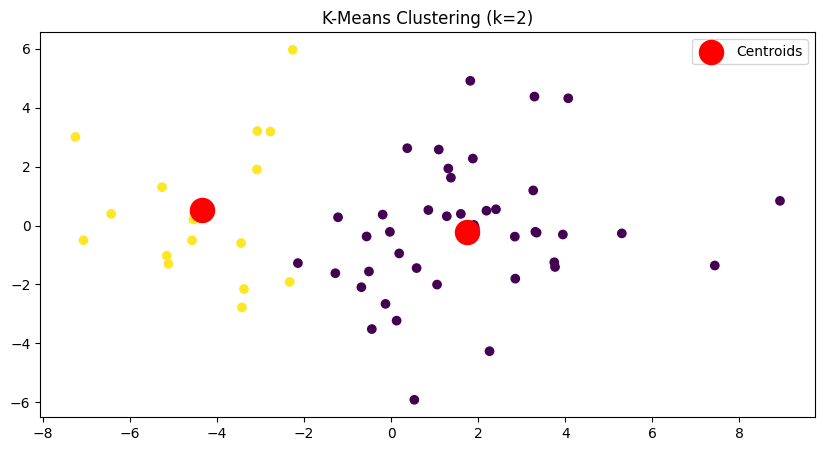

In [20]:
# Print K means with 3 clusters
plt.figure(figsize=(10, 5))
plt.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.legend()
plt.show()

In [25]:
# Saving model
joblib.dump(kmeans_model, 'kmeans_model.joblib')

['kmeans_model.joblib']

### Usage
If you want to use model you have to apply PCA then use it in model 
enjoy